## Sine curve test
### This notebook shows how to import da_rnn_from_csv.py to use the da_rnn class.  (WARNING: the training takes about 20 minutes to run on a 2016 Macbook Pro)

### The notebook cells do the following:  
1. Create ocillating values using np.sin;
2. Save a DataFrame with 2 columns;  
 * x_vals = degrees from 0 to 36000, 4 degrees spacing
 * y_vals = np.sin(x_vals * np.pi / 180)
3. Name the column with the y_values "close";
4. Save the DataFrame to data/sin_vals.csv;
5. Run da_rnn_from_csv.main using 5000 rows;
6. Plot the y_act values vs y_pred values to show that they align.

### Imports

In [1]:
import pandas as pd
import sys,os
import numpy as np
import pandas as pd
import da_rnn_from_csv as drfc

### Create csv

In [ ]:
noise_level = .1
x_vals = np.linspace(0,360*100,360*100/4 + 1)
y_vals = np.sin(x_vals*np.pi/180)
y_vals = y_vals + np.random.randn(len(y_vals)) * noise_level
df = pd.DataFrame({'x_vals':x_vals,'close':y_vals})
df.to_csv('data/sin_vals.csv',index=False)

### Run the da_rnn model

2019-01-23 21:09:57,516 - VOC_TOPICS - INFO - Shape of data: (5000, 3).
Missing in data: 0.
2019-01-23 21:09:57,516 - VOC_TOPICS - INFO - Shape of data: (5000, 3).
Missing in data: 0.
2019-01-23 21:09:57,524 - VOC_TOPICS - INFO - Training size: 3500.
2019-01-23 21:09:57,524 - VOC_TOPICS - INFO - Training size: 3500.
2019-01-23 21:09:57,531 - VOC_TOPICS - INFO - Is CUDA available? False.
2019-01-23 21:09:57,531 - VOC_TOPICS - INFO - Is CUDA available? False.
2019-01-23 21:09:57,534 - VOC_TOPICS - INFO - Iterations per epoch: 28.
2019-01-23 21:09:57,534 - VOC_TOPICS - INFO - Iterations per epoch: 28.


['close' 'x_vals'] (9001, 2)
moving the close column to the label_column


/Users/bperlman1/Virtualenvs3/pyliverisk/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/Users/bperlman1/Documents/billybyte/pyliverisk/jupyter_notebooks/da_rnn/da_rnn_from_csv.py:301: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a_e_k = F.softmax(v_e_k) # get probabilities
/Users/bperlman1/Documents/billybyte/pyliverisk/jupyter_notebooks/da_rnn/da_rnn_from_csv.py:365: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  )).view(-1, self.T - 1)) # batch_size * T - 1, row sum up to 1
/Users/bperlman1/Documents/billybyte/pyliverisk/jupyter_notebooks/da_rnn/da_rnn_from_csv.py:506: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to conve

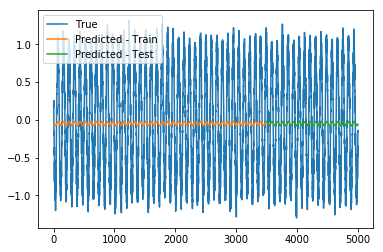

2019-01-23 21:12:19,325 - VOC_TOPICS - INFO - Epoch 10, loss: 0.054.
2019-01-23 21:12:19,325 - VOC_TOPICS - INFO - Epoch 10, loss: 0.054.


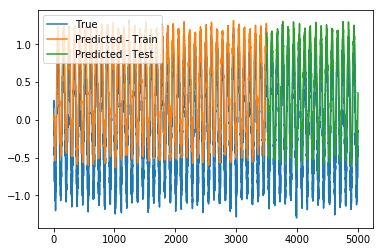

2019-01-23 21:14:18,149 - VOC_TOPICS - INFO - Epoch 20, loss: 0.021.
2019-01-23 21:14:18,149 - VOC_TOPICS - INFO - Epoch 20, loss: 0.021.


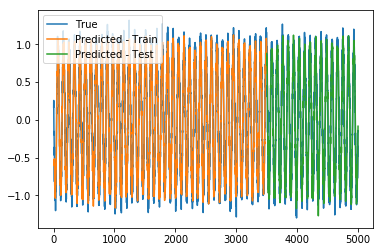

2019-01-23 21:16:30,154 - VOC_TOPICS - INFO - Epoch 30, loss: 0.020.
2019-01-23 21:16:30,154 - VOC_TOPICS - INFO - Epoch 30, loss: 0.020.


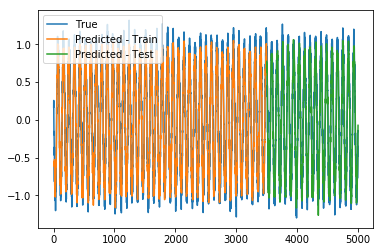

2019-01-23 21:18:54,519 - VOC_TOPICS - INFO - Epoch 40, loss: 0.018.
2019-01-23 21:18:54,519 - VOC_TOPICS - INFO - Epoch 40, loss: 0.018.


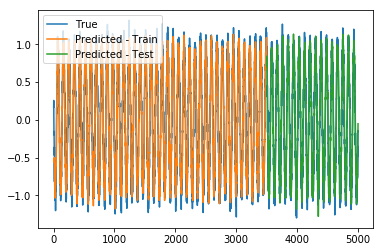

2019-01-23 21:20:47,241 - VOC_TOPICS - INFO - Epoch 50, loss: 0.019.
2019-01-23 21:20:47,241 - VOC_TOPICS - INFO - Epoch 50, loss: 0.019.


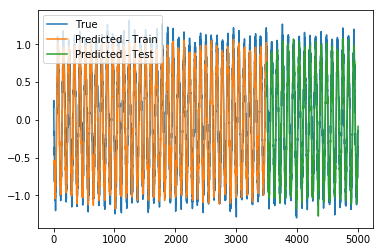

2019-01-23 21:22:44,981 - VOC_TOPICS - INFO - Epoch 60, loss: 0.017.
2019-01-23 21:22:44,981 - VOC_TOPICS - INFO - Epoch 60, loss: 0.017.


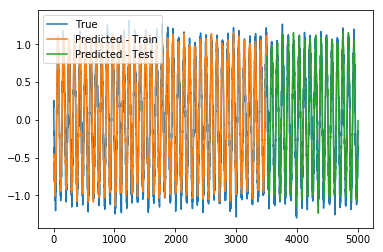

2019-01-23 21:24:44,526 - VOC_TOPICS - INFO - Epoch 70, loss: 0.017.
2019-01-23 21:24:44,526 - VOC_TOPICS - INFO - Epoch 70, loss: 0.017.


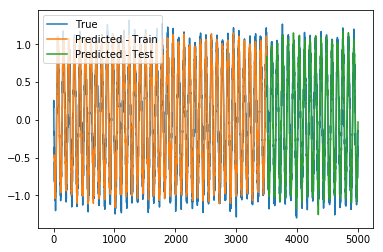

2019-01-23 21:26:42,783 - VOC_TOPICS - INFO - Epoch 80, loss: 0.017.
2019-01-23 21:26:42,783 - VOC_TOPICS - INFO - Epoch 80, loss: 0.017.


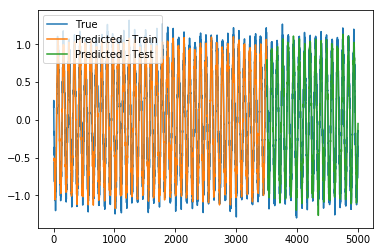

2019-01-23 21:28:39,593 - VOC_TOPICS - INFO - Epoch 90, loss: 0.017.
2019-01-23 21:28:39,593 - VOC_TOPICS - INFO - Epoch 90, loss: 0.017.


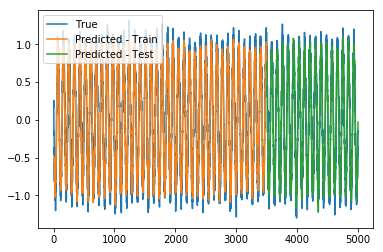

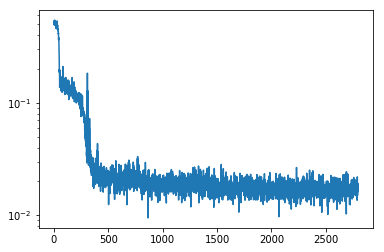

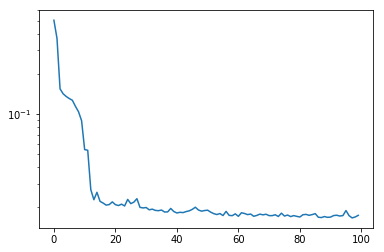

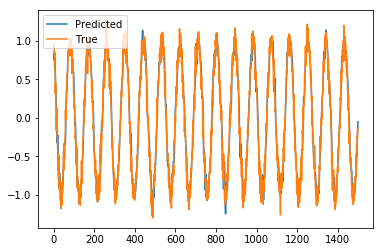

mean predicted price from pred_df: -0.011323, mean predicted price from model.predict: -0.006321


In [9]:
fname_no_ext = 'sin_vals'
rows_to_use = 5000
return_dict = drfc.main(FILE_NAME_NO_EXTENSION=fname_no_ext,subset_rows=rows_to_use)
df_partial = return_dict['dataframe']
m = return_dict['model']


### Plot a zoomed in portion of the DataFrame that compares y_act with y_pred

1500 1500 1500


/Users/bperlman1/Virtualenvs3/pyliverisk/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


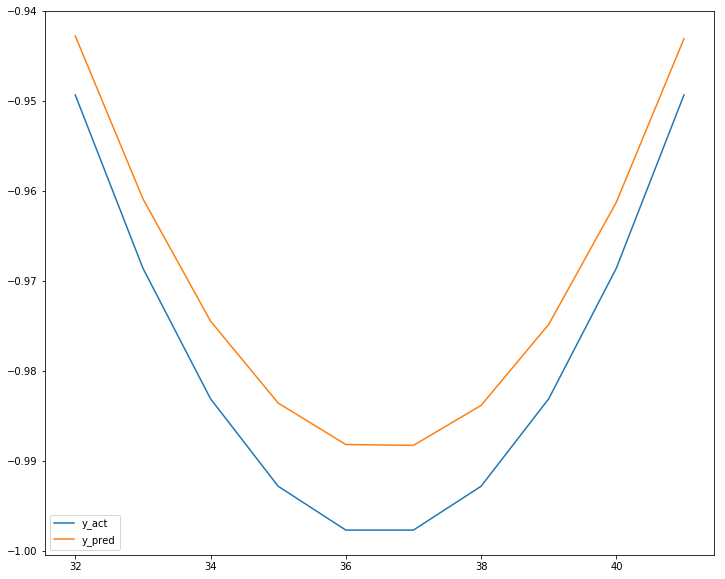

In [4]:
test_size = return_dict['test_size']
y_act = m.y[-1*test_size:]
y_pred = return_dict['y_pred'][-1 * test_size:]
print(test_size,len(y_act),len(y_pred))
df_review = pd.DataFrame({'y_act':y_act,'y_pred':y_pred})

num_to_view = 10

beg_index = 32
end_index = beg_index+num_to_view
df_review.iloc[beg_index:end_index].plot(y=['y_act','y_pred'],figsize=(12,10))

In [5]:
df_review.iloc[beg_index:end_index]

,y_act,y_pred
32,-0.949333,-0.942779
33,-0.968572,-0.960862
34,-0.983084,-0.974454
35,-0.992798,-0.983558
36,-0.997667,-0.988164
37,-0.997667,-0.988257
38,-0.992798,-0.983819
39,-0.983084,-0.974824
40,-0.968572,-0.961252
41,-0.949333,-0.943085
